# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

The following function may be useful for loading the necessary data.

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [ ]:
# loss, gradient, SGD functions

def loss(X, Y, w):
    '''
    Calculate the log loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The average log loss evaluated with respect to X, Y, and w.
    '''
    
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    N = len(Y)
    loss = 0
    for i in range(N):
        x = X[i,:]
        y = Y[i]
        loss -= np.log(1 / (1 + np.exp(-y * np.dot(w,x))))
    return loss / N

def gradient(x, y, w, lmbda, N):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        N: sample size
        
    Output:
        The gradient of the loss with respect to w. 
    '''

    #==============================================
    # TODO: Implement the gradient of the
    # loss function.
    #============================================== 
    return -y * x / (1 + np.exp(y * np.dot(x,w))) + (2 * lmbda / N) * w

def SGD(X, Y, w_start, eta, lmbda, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, regularization term lmbda, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        lmbda: Regularization term
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #============================================== 
    N = len(Y)
    w = w_start 
    for t in range(N_epochs):
        order = np.random.permutation(N)
        for i in order:
            w = w - eta * gradient(X[i,:], Y[i], w, lmbda, N)
    return w
            
       

In [ ]:
# Load data

training1 = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_training1.txt')
training2 = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_training2.txt')
validation = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_validation.txt')

D = len(training1[0]) - 1

X1 = training1[:,1:]
X2 = training2[:,1:]
X_v = validation[:,1:]

Y1 = training1[:,0]
Y2 = training2[:,0]
Y_v = validation[:,0]

# normalize X and insert x0 = 1
mean1 = np.mean(X1, axis=0)
std1 = np.std(X1, axis=0)
X1 = (X1 - mean1) / std1
X1 = np.insert(X1, 0, 1, axis=1)

mean2 = np.mean(X2, axis=0)
std2 = np.std(X2, axis=0)
X2 = (X2 - mean2) / std2
X2 = np.insert(X2, 0, 1, axis=1)

X_v1 = (X_v - mean1) / std1
X_v2 = (X_v - mean2) / std2
X_v1 = np.insert(X_v1, 0, 1, axis=1)
X_v2 = np.insert(X_v2, 0, 1, axis=1)

In [ ]:
# Training

N_epochs = 20000
eta = 5e-4
lmbdas = [1e-5 * (5 ** i) for i in range(15)]
losses1 = []
losses2 = []
losses_v1 = []
losses_v2 = []
norms1 = []
norms2 = []

for lmbda in lmbdas:
    w1 = np.random.random(D + 1) / 10
    w2 = np.random.random(D + 1) / 10
    w1_final = SGD(X1, Y1, w1, eta, lmbda, N_epochs)
    w2_final = SGD(X2, Y2, w2, eta, lmbda, N_epochs)

    loss1 = loss(X1, Y1, w1_final)
    loss2 = loss(X2, Y2, w2_final)
    loss_v1 = loss(X_v1, Y_v, w1_final)
    loss_v2 = loss(X_v2, Y_v, w2_final)

    losses1.append(loss1)
    losses2.append(loss2)
    losses_v1.append(loss_v1)
    losses_v2.append(loss_v2)
    norms1.append(np.linalg.norm(w1_final))
    norms2.append(np.linalg.norm(w2_final))

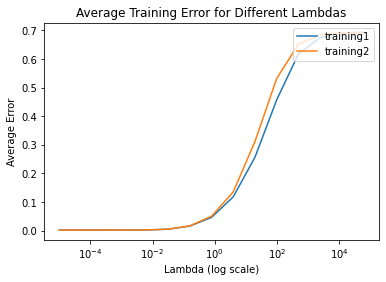

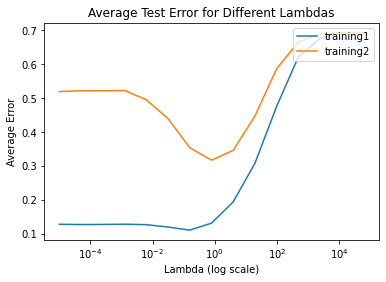

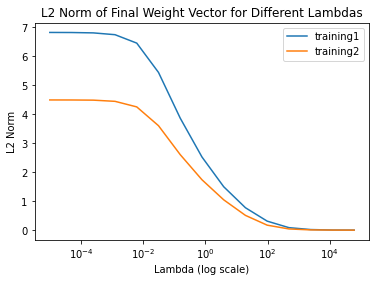

In [ ]:
# average training error
plt.figure()
plt.plot(lmbdas, losses1, label = 'training1')
plt.plot(lmbdas, losses2, label = 'training2')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Average Error')
plt.title('Average Training Error for Different Lambdas')
plt.legend(loc='upper right')
plt.show()

# average test error
plt.figure()
plt.plot(lmbdas, losses_v1, label = 'training1')
plt.plot(lmbdas, losses_v2, label = 'training2')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Average Error')
plt.title('Average Test Error for Different Lambdas')
plt.legend(loc='upper right')
plt.show()

# l2 norm
plt.figure()
plt.plot(lmbdas, norms1, label = 'training1')
plt.plot(lmbdas, norms2, label = 'training2')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('L2 Norm')
plt.title('L2 Norm of Final Weight Vector for Different Lambdas')
plt.legend(loc='upper right')
plt.show()